In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score

In [2]:
data = pd.read_csv('final.csv') 


In [3]:
data = data.dropna()

In [4]:
X = data.drop(['MB'], axis=1)  
y = data['MB']  

In [5]:
y_svm = 2 * y - 1


In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_svm, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)


In [7]:
class LinearSVM(tf.keras.Model):
    def __init__(self, input_dim):
        super(LinearSVM, self).__init__()
        self.dense = tf.keras.layers.Dense(1, kernel_initializer='zeros', activation=None)

    def call(self, inputs):
        return self.dense(inputs)

In [8]:
def hinge_loss(y_true, y_pred):
    return tf.reduce_mean(tf.maximum(0.0, 1 - y_true * y_pred))

In [9]:
input_dim = X_train.shape[1]  

In [10]:
model = LinearSVM(input_dim)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation=None)
])

In [12]:
model.compile(
    optimizer='adam', 
    loss=hinge_loss, 
)

In [13]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_val, y_val)
)

Epoch 1/10
430/430 [==============================] - 0s 349us/step - loss: 0.4969 - val_loss: 0.3477
Epoch 2/10
430/430 [==============================] - 0s 248us/step - loss: 0.2723 - val_loss: 0.2493
Epoch 3/10
430/430 [==============================] - 0s 247us/step - loss: 0.2172 - val_loss: 0.2129
Epoch 4/10
430/430 [==============================] - 0s 247us/step - loss: 0.1935 - val_loss: 0.1931
Epoch 5/10
430/430 [==============================] - 0s 247us/step - loss: 0.1789 - val_loss: 0.1798
Epoch 6/10
430/430 [==============================] - 0s 247us/step - loss: 0.1686 - val_loss: 0.1702
Epoch 7/10
430/430 [==============================] - 0s 246us/step - loss: 0.1604 - val_loss: 0.1625
Epoch 8/10
430/430 [==============================] - 0s 246us/step - loss: 0.1541 - val_loss: 0.1569
Epoch 9/10
430/430 [==============================] - 0s 247us/step - loss: 0.1487 - val_loss: 0.1520
Epoch 10/10
430/430 [==============================] - 0s 249us/step - loss: 0.144

In [14]:
y_pred = model.evaluate(X_test)

123/123 [==============================] - 0s 198us/step - loss: 0.0000e+00


In [15]:
print("Training Metrics:")
y_train_pred = model.predict(X_train)
y_train_pred_labels = (y_train_pred > 0).astype(int).flatten()
y_train_pred_labels = 2 * y_train_pred_labels - 1 

Training Metrics:
430/430 [==============================] - 0s 184us/step


In [16]:
train_loss = hinge_loss(y_train_pred_labels, y_train_pred).numpy()
print(f"Loss: {train_loss:.4f}")

train_accuracy = accuracy_score(y_train, y_train_pred_labels)
print(f"Accuracy: {train_accuracy:.4f}")

train_auc = roc_auc_score(y_train, y_train_pred)
print(f"AUC: {train_auc:.4f}")

train_cm = confusion_matrix(y_train, y_train_pred_labels)
tn, fp, fn, tp = train_cm.ravel()
train_sensitivity = tp / (tp + fn)
train_specificity = tn / (tn + fp)
print(f"Sensitivity: {train_sensitivity:.4f}")
print(f"Specificity: {train_specificity:.4f}")

train_f1 = f1_score(y_train, y_train_pred_labels)
print(f"F1 Score: {train_f1:.4f}")

Loss: 0.8061
Accuracy: 0.9471
AUC: 0.9831
Sensitivity: 0.8000
Specificity: 0.9774
F1 Score: 0.8380


In [17]:
print("\nValidation Metrics:")
y_val_pred = model.predict(X_val)
y_val_pred_labels = (y_val_pred > 0).astype(int).flatten() 
y_val_pred_labels = 2 * y_val_pred_labels - 1 

val_loss = hinge_loss(y_val_pred_labels, y_val_pred).numpy()
print(f"Loss: {val_loss:.4f}")
val_accuracy = accuracy_score(y_val, y_val_pred_labels)
print(f"Accuracy: {val_accuracy:.4f}")

val_auc = roc_auc_score(y_val, y_val_pred)
print(f"AUC: {val_auc:.4f}")

val_cm = confusion_matrix(y_val, y_val_pred_labels)
tn, fp, fn, tp = val_cm.ravel()
val_sensitivity = tp / (tp + fn)
val_specificity = tn / (tn + fp)
print(f"Sensitivity: {val_sensitivity:.4f}")
print(f"Specificity: {val_specificity:.4f}")

val_f1 = f1_score(y_val, y_val_pred_labels)
print(f"F1 Score: {val_f1:.4f}")


Validation Metrics:
62/62 [==============================] - 0s 216us/step
Loss: 0.8635
Accuracy: 0.9511
AUC: 0.9824
Sensitivity: 0.8214
Specificity: 0.9806
F1 Score: 0.8617


In [18]:
print("\nTest Metrics:")
y_test_pred = model.predict(X_test)
y_test_pred_labels = (y_test_pred > 0).astype(int).flatten()
y_test_pred_labels = 2 * y_test_pred_labels - 1 

test_loss = hinge_loss (y_test_pred_labels, y_test_pred).numpy()
print(f"Loss: {test_loss:.4f}")

# Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_labels)
print(f"Accuracy: {test_accuracy:.4f}")

# AUC
test_auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC: {test_auc:.4f}")

# Confusion Matrix for Sensitivity and Specificity
test_cm = confusion_matrix(y_test, y_test_pred_labels)
tn, fp, fn, tp = test_cm.ravel()
test_sensitivity = tp / (tp + fn)
test_specificity = tn / (tn + fp)
print(f"Sensitivity: {test_sensitivity:.4f}")
print(f"Specificity: {test_specificity:.4f}")

# F1 Score
test_f1 = f1_score(y_test, y_test_pred_labels)
print(f"F1 Score: {test_f1:.4f}")


Test Metrics:
123/123 [==============================] - 0s 194us/step
Loss: 0.8600
Accuracy: 0.9465
AUC: 0.9843
Sensitivity: 0.8084
Specificity: 0.9786
F1 Score: 0.8509


In [19]:
import shap

In [20]:
background_data = shap.kmeans(X_train, 10)  # Use 10 clusters, adjust as necessary
explainer = shap.KernelExplainer(model.predict, background_data)
shap_values = explainer.shap_values(X_test)

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/3925 [00:00<?, ?it/s]

664/664 [==============================] - 0s 358us/step


In [21]:
shap_values_reshaped = np.squeeze(shap_values)  # Removes the last dimension
print(shap_values_reshaped.shape)

(3925, 38)


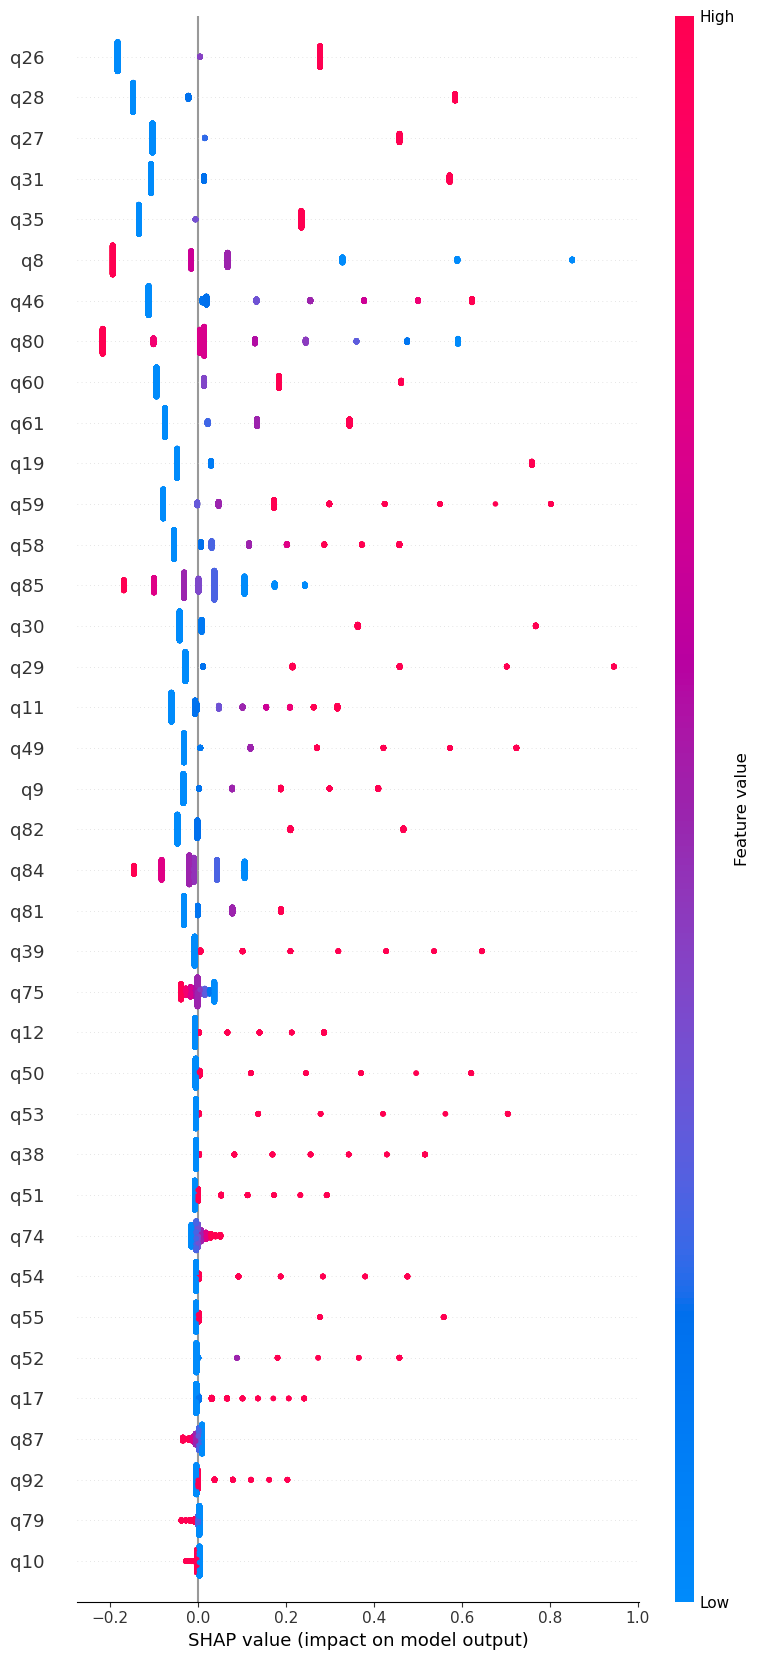

In [22]:
shap.summary_plot(shap_values_reshaped, X_test, max_display=X_test.shape[1])